# Isotonic Regression for prediction

**Notes**
* important or used function worth to check aside will be point to a reference to be reviewed in detail. 

In [31]:
# Package imports
import os                                               
import numpy as np                                          
import scipy.stats as st                                    
import pandas as pd                                         
import matplotlib.pyplot as plt                             
from sklearn.isotonic import IsotonicRegression
from sklearn.model_selection import train_test_split        
from sklearn.metrics import explained_variance_score

In [32]:
# Set our working directory
os.chdir("/Users/marcemq/reposWD")

In [36]:
# Housing_price.csv with 128 entries
df = pd.read_csv("Housing_price.csv") 
df.head()
#df.shape

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


### Preparing data for train and test
We're going to do it using [`train_test_split(.)`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and then the data is going to be plotted.

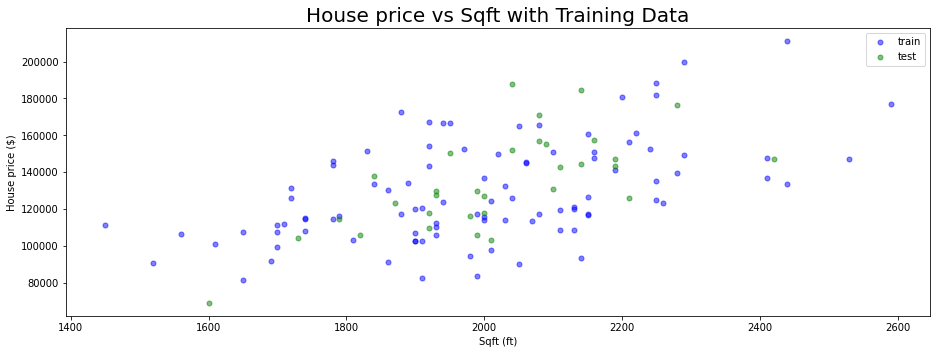

In [39]:
X_data = df.iloc[:,2]
y_data = df.iloc[:,1]
# Split test data to be 25% in overall.
# using a fixed random_state so the split is reproducible accross multiple function calls
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25, random_state=17)
plt.subplot(111)
plt.scatter(X_train, y_train,  color='blue', s=25, alpha=0.5, label='train')
plt.scatter(X_test, y_test,  color='green', s=25, alpha =0.5, label='test')
plt.title('House price vs Sqft with Training Data', fontsize=20)
plt.xlabel('Sqft (ft)')
plt.ylabel('House price ($)')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()
plt.show()

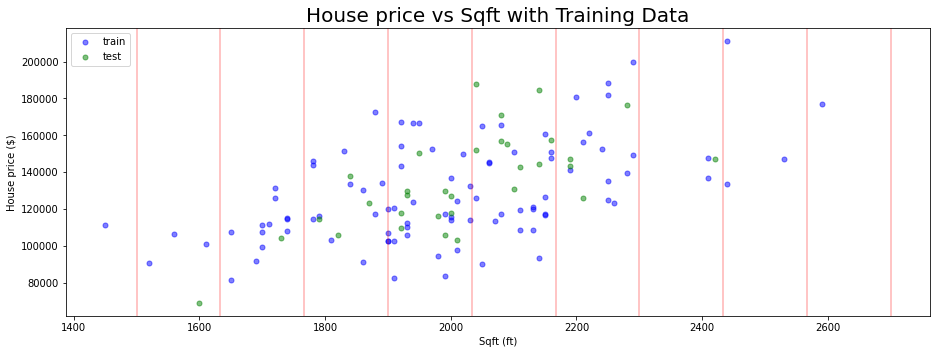

In [44]:
# visualization of thresholds
X_predict = np.linspace(1500,2700,10)
plt.subplot(111)
plt.scatter(X_train, y_train,  color='blue', s=25, alpha=0.5, label='train')
plt.scatter(X_test, y_test,  color='green', s=25, alpha =0.5, label='test')
for threshold in X_predict:
    plt.axvline(threshold, color='red', alpha = 0.3)
plt.title('House price vs Sqft with Training Data', fontsize=20)
plt.xlabel('Sqft (ft)')
plt.ylabel('House price ($)')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()
plt.show()

### Fitting the Isotonic model
We're going to git the model with the thresholds defined using [`IsotonicRegression(.)`](https://scikit-learn.org/stable/modules/generated/sklearn.isotonic.IsotonicRegression.html)

In [45]:
iso_reg = IsotonicRegression().fit(X_train, y_train)
y_predict = iso_reg.predict(X_predict)
y_predict

array([ 98485.71428571,  98485.71428571, 120052.98245614, 120589.47368421,
       127005.55555556, 146500.        , 158325.        , 162583.33333333,
       171744.44444444,             nan])

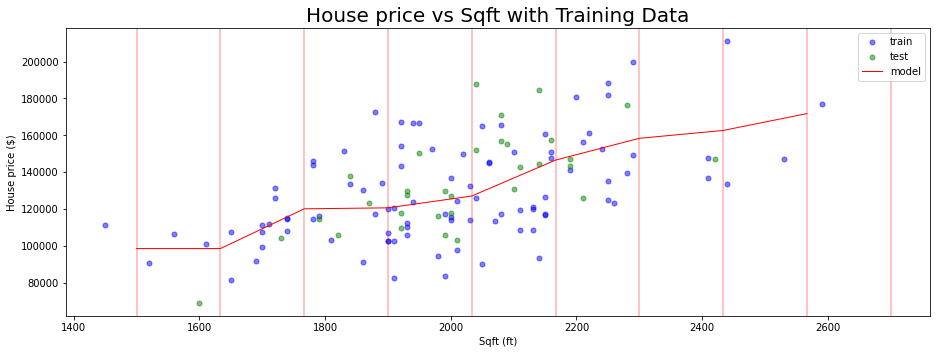

In [46]:
# Plotting the model
plt.scatter(X_train, y_train,  color='blue', s=25, alpha=0.5, label='train')
plt.scatter(X_test, y_test,  color='green', s=25, alpha =0.5, label='test')
plt.plot(X_predict, y_predict, color='red', linewidth=1, label='model')
for threshold in X_predict:
    plt.axvline(threshold, color='red', alpha = 0.3)
plt.title('House price vs Sqft with Training Data', fontsize=20)
plt.xlabel('Sqft (ft)')
plt.ylabel('House price ($)')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()
plt.show()

### Model cheks
We're going to make predictions using testing data for the model check using the variance explained [`explained_variance_score(.)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html#sklearn-metrics-explained-variance-score)

In [47]:
y_predict_test = iso_reg.transform(X_test)
r2 = explained_variance_score(y_test,y_predict_test)
print('Variance Explained = ' + str(round(r2,3)))

Variance Explained = 0.225


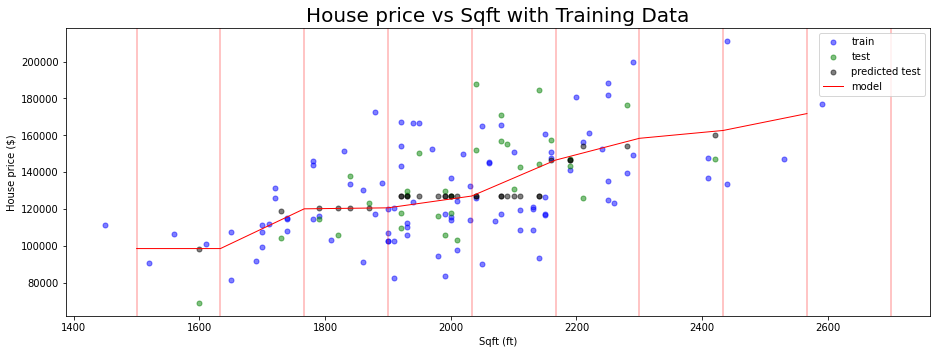

In [48]:
# plotting the test prediction
plt.scatter(X_train, y_train,  color='blue', s=25, alpha=0.5, label='train')
plt.scatter(X_test, y_test,  color='green', s=25, alpha =0.5, label='test')
plt.scatter(X_test, y_predict_test,  color='black', s=25, alpha =0.5, label='predicted test')
plt.plot(X_predict, y_predict, color='red', linewidth=1, label='model')
for threshold in X_predict:
    plt.axvline(threshold, color='red', alpha = 0.3)
plt.title('House price vs Sqft with Training Data', fontsize=20)
plt.xlabel('Sqft (ft)')
plt.ylabel('House price ($)')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()
plt.show()

### Number of isotonic constraints as parameter
We can vary the number of isotonic constraints an see how does it affect the overall model

Variance Explained = 0.225


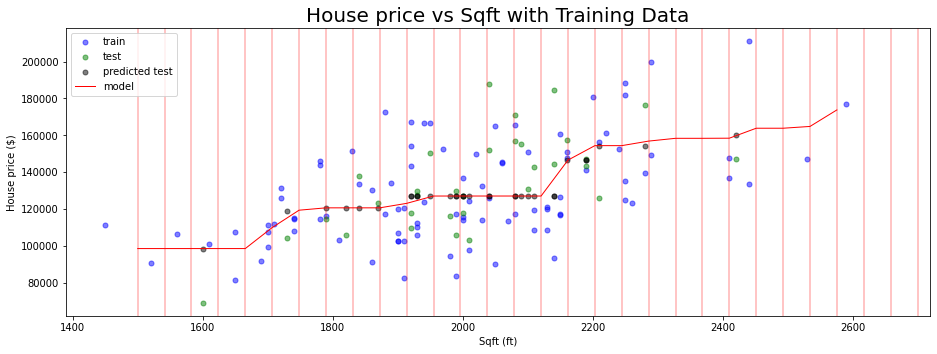

In [52]:
num_isotonic_cstr = 30
X_predict = np.linspace(1500,2700,num_isotonic_cstr)
iso_reg = IsotonicRegression().fit(X_train, y_train)
y_predict = iso_reg.predict(X_predict)

# making prediction at testing data
y_predict_test = iso_reg.transform(X_test)
r2 = explained_variance_score(y_test,y_predict_test)
print('Variance Explained = ' + str(round(r2,3)))

# plotting the test prediction
plt.scatter(X_train, y_train,  color='blue', s=25, alpha=0.5, label='train')
plt.scatter(X_test, y_test,  color='green', s=25, alpha =0.5, label='test')
plt.scatter(X_test, y_predict_test,  color='black', s=25, alpha =0.5, label='predicted test')
plt.plot(X_predict, y_predict, color='red', linewidth=1, label='model')
for threshold in X_predict:
    plt.axvline(threshold, color='red', alpha = 0.3)
plt.title('House price vs Sqft with Training Data', fontsize=20)
plt.xlabel('Sqft (ft)')
plt.ylabel('House price ($)')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()
plt.show()